In [21]:
#import sys
#!{sys.executable} -m pip install --user pandas

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.pyplot import gca

In [22]:
freq = {}

In [23]:
def read_file(name = 'words.txt'):
    cou = 0
    with open(name, encoding="utf-8", errors='ignore') as f:
        for word in f:
            #print(word)
            for char in word:
                if char in freq:
                    freq[char]=freq[char]+1
                else:
                    freq[char]=int(1)

In [24]:
read_file()

In [25]:
#print(freq)
try:
    del freq['\n']
    del freq['\ufeff']
    del freq['\u200c']
    for char in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789':
        try:
            del freq[char]
        except:
            pass
except:
    pass
print(freq)

{'য': 4068, 'ে': 7499, 'থ': 1196, 'া': 29872, 'স': 5722, 'ক': 12441, 'র': 19321, 'গ': 4848, 'ু': 7453, 'ল': 7955, 'ো': 5151, 'ন': 14201, 'হ': 2662, 'ত': 11838, 'ই': 1389, 'ভ': 2441, 'ব': 10689, 'ম': 9607, 'ট': 4004, 'ি': 16847, 'খ': 2227, 'য়': 3690, 'ফ': 1297, 'ৌ': 474, 'ী': 5146, '্': 22616, 'জ': 4304, 'দ': 6662, 'ধ': 2882, 'ৃ': 966, 'শ': 4327, '-': 1330, 'প': 8318, 'ণ': 2219, 'ষ': 2727, 'ঙ': 1045, 'ূ': 1161, 'ও': 739, 'ড়': 1932, 'ঃ': 218, 'ঞ': 705, 'ং': 787, 'ৎ': 510, 'চ': 4122, 'ছ': 1132, 'ঠ': 767, 'ড': 778, 'ঘ': 803, 'উ': 1262, '/': 7, 'আ': 1761, '\u200c': 293, 'ঁ': 1656, 'অ': 2883, 'ঝ': 412, 'ঊ': 53, 'ঢ়': 53, 'ৈ': 395, 'ঢ': 202, ' ': 20, 'এ': 642, '’': 17, 'ঈ': 57, ':': 6, 'ঋ': 54, '”': 2, 'ঔ': 42, 'ঐ': 36, '*': 12, 'j': 1, 'w': 1, 'l': 2, 'o': 3, 's': 1, 'm': 4, 'n': 1, '@': 1, 'g': 1, 'i': 1, '.': 11, 'h': 1, 't': 2, 'p': 1, '২': 5, '৩': 3, '১': 1, '৪': 1, '০': 4, '৮': 1, "'": 1}


No handles with labels found to put in legend.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  import sys


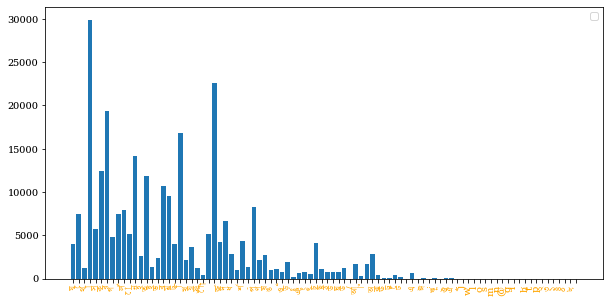

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
prop = fm.FontProperties(fname='Nikosh.ttf')
ax.legend(prop=prop)

font_dirs = ['./', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'Nikosh'

keys = freq.keys()
values = freq.values()


plt.bar(range(len(freq)), list(values), align='center')
plt.xticks(np.arange(len(keys)), keys, color='orange', rotation=90)

plt.show()